<a href="https://colab.research.google.com/github/anirudhr20/IDA-Audio/blob/master/Audio_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob  
import os  
import librosa  
import numpy as np  
from keras.models import Sequential  
from keras.layers import Dense, Activation  
from keras.layers import Dropout  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def extract_feature(file_name): 
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
              mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
              print ("Error encountered while parsing file: ", fn)
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[-1].split('-')[2])
    return np.array(features), np.array(labels, dtype = np.int)

In [0]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels+1))
    one_hot_encode[np.arange(n_labels), labels] = 1
    one_hot_encode=np.delete(one_hot_encode, 0, axis=1)
    return one_hot_encode

In [0]:
main_dir = '/content/drive/My Drive/data/audio/'  
sub_dir=  os.listdir(main_dir)
print(sub_dir)
# !ls {main_dir}

['Actor_16', 'Actor_17', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_22', 'Actor_24', 'Actor_15', 'Actor_23', 'Actor_10', 'Actor_08', 'Actor_05', 'Actor_14', 'Actor_09', 'Actor_07', 'Actor_13', 'Actor_06', 'Actor_11', 'Actor_12', 'Actor_03', 'Actor_02', 'Actor_04', 'Actor_01']


In [0]:
fn = '/content/drive/My Drive/data/audio/Actor_19/03-01-02-01-01-02-19.wav'
labels = np.empty(0)
labels = np.append(labels,fn.split('/')[-1].split('-')[2])
print(np.array(labels, dtype = np.int))

[2]


In [0]:
features, labels = np.empty((0,193)), np.empty(0)
fn = '/content/drive/My Drive/data/audio/Actor_19/03-01-01-01-01-02-19.wav'
mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
features = np.vstack([features,ext_features])
labels = np.append(labels, fn)
print(np.array(features))
print(np.array(labels))

[[-7.15902974e+02  7.87028817e+01  1.17341330e+01  2.18769672e+01
   8.05743561e+00  9.53279766e+00  5.23871226e-01 -5.84712778e+00
  -9.31647301e+00  1.73579065e+00  1.83290767e+00 -1.07688674e+00
   5.00578132e+00  3.36697535e+00 -1.90769556e+00  6.29388749e+00
  -1.00657667e+00 -1.44449662e+00  3.75471266e+00  5.06371243e+00
  -4.28182851e+00  2.23100645e-01 -2.74282888e+00 -1.42769328e+00
  -9.86619554e-02  1.06042923e+00 -4.49956501e-01  2.59909242e+00
   9.60827603e-01  2.18549894e+00  1.80641912e+00 -1.33969802e+00
  -1.71409149e+00  2.49751533e+00  9.58830359e-02  2.58858129e+00
  -1.57328926e+00 -3.34214114e-02 -8.80494184e-01  7.99018005e-01
   6.51460727e-01  6.82427932e-01  6.97937100e-01  6.71504324e-01
   6.01177987e-01  6.36365523e-01  6.58831587e-01  6.69353252e-01
   7.42284964e-01  6.84035859e-01  6.35821538e-01  6.58507959e-01
   1.87839691e-04  4.71929092e-05  5.46206720e-04  6.47555807e-03
   1.14928358e-02  8.28012923e-03  4.98828816e-03  1.60718781e-02
   2.02494

In [0]:
main_dir = '/content/drive/My Drive/data/audio/'  
sub_dir=os.listdir(main_dir)  
print ("\ncollecting features and labels...")  
print("\nthis will take some time...")  
features,labels = parse_audio_files(main_dir,sub_dir)  

# print(labels) 
print("done") 

np.save('/content/drive/My Drive/data/X.npy',features)  
#one hot encoding labels  
labels = one_hot_encode(labels)  

np.save('/content/drive/My Drive/data/y.npy', labels)


collecting features and labels...

this will take some time...
done


In [0]:
X= features  
y= labels
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
n_dim = train_x.shape[1]  
n_classes = train_y.shape[1]  
n_hidden_units_1 = n_dim  
n_hidden_units_2 = 400 # approx n_dim * 2  
n_hidden_units_3 = 200 # half of layer 2  
n_hidden_units_4 = 100

In [0]:
def create_model(activation_function='relu', init_type='normal', optimiser='adam', dropout_rate=0.2):  
   model = Sequential()  
   # layer 1  
   model.add(Dense(n_hidden_units_1, input_dim=n_dim, init=init_type, activation=activation_function))  
   # layer 2  
   model.add(Dense(n_hidden_units_2, init=init_type, activation=activation_function))  
   model.add(Dropout(dropout_rate))  
   # layer 3  
   model.add(Dense(n_hidden_units_3, init=init_type, activation=activation_function))  
   model.add(Dropout(dropout_rate))  
   #layer4  
   model.add(Dense(n_hidden_units_4, init=init_type, activation=activation_function))  
   model.add(Dropout(dropout_rate))  
   # output layer  
   model.add(Dense(n_classes, init=init_type, activation='softmax'))  
   #model compilation  
   model.compile(loss='categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])  
   return model

In [0]:
 #create the model  
 model = create_model()  
 #train the model  
 history = model.fit(train_x, train_y, epochs=200, batch_size=4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(193, input_dim=193, activation="relu", kernel_initializer="normal")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, activation="relu", kernel_initializer="normal")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", kernel_initializer="normal")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="normal")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="softmax", k

Epoch 1/200
1152/1152 [==============================] - 3s 2ms/step - loss: 2.1941 - accuracy: 0.1675
Epoch 2/200
1152/1152 [==============================] - 1s 934us/step - loss: 1.9139 - accuracy: 0.2274
Epoch 3/200
1152/1152 [==============================] - 1s 935us/step - loss: 1.8364 - accuracy: 0.2639
Epoch 4/200
1152/1152 [==============================] - 1s 937us/step - loss: 1.8007 - accuracy: 0.2865
Epoch 5/200
1152/1152 [==============================] - 1s 917us/step - loss: 1.7496 - accuracy: 0.3021
Epoch 6/200
1152/1152 [==============================] - 1s 921us/step - loss: 1.7309 - accuracy: 0.3212
Epoch 7/200
1152/1152 [==============================] - 1s 925us/step - loss: 1.6750 - accuracy: 0.3264
Epoch 8/200
1152/1152 [==============================] - 1s 920us/step - loss: 1.6431 - accuracy: 0.3663
Epoch 9/200
1152/1152 [==============================] - 1s 929us/step - loss: 1.6538 - accuracy: 0.3550
Epoch 10/200
1152/1152 [==============================] -

KeyboardInterrupt: ignored

In [0]:
#predicting from the model  
 predict=model.predict(test_x,batch_size=4)

In [0]:
 emotions=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  
 #predicted emotions from the test set  
 y_pred = np.argmax(predict, 1)  
 predicted_emo=[]   
 for i in range(0,test_y.shape[0]):  
   emo=emotions[y_pred[i]]  
   predicted_emo.append(emo)

In [0]:
print(predicted_emo)

['disgust', 'fearful', 'calm', 'calm', 'angry', 'calm', 'happy', 'surprised', 'disgust', 'neutral', 'disgust', 'surprised', 'calm', 'fearful', 'disgust', 'disgust', 'fearful', 'disgust', 'calm', 'angry', 'happy', 'calm', 'calm', 'sad', 'disgust', 'sad', 'surprised', 'surprised', 'surprised', 'sad', 'surprised', 'angry', 'happy', 'happy', 'surprised', 'neutral', 'surprised', 'happy', 'happy', 'angry', 'surprised', 'calm', 'sad', 'fearful', 'disgust', 'calm', 'calm', 'sad', 'happy', 'calm', 'surprised', 'surprised', 'happy', 'angry', 'neutral', 'calm', 'sad', 'disgust', 'happy', 'calm', 'sad', 'fearful', 'disgust', 'surprised', 'happy', 'sad', 'calm', 'calm', 'disgust', 'sad', 'happy', 'disgust', 'calm', 'angry', 'surprised', 'calm', 'happy', 'disgust', 'sad', 'disgust', 'sad', 'happy', 'happy', 'calm', 'surprised', 'angry', 'fearful', 'calm', 'happy', 'surprised', 'calm', 'sad', 'sad', 'angry', 'disgust', 'disgust', 'disgust', 'happy', 'happy', 'neutral', 'disgust', 'fearful', 'surprise

In [0]:
fe, labels = np.empty((0,193)), np.empty(0)
fn = '/content/drive/My Drive/data/audio/Actor_19/03-01-08-02-01-02-19.wav'
mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
fe = np.vstack([fe,ext_features])

p = model.predict_proba(fe)
# print(p)
indexssad = np.argmax(p[0])
em = emotions[indexssad]
print(em)

happy


In [0]:
 actual_emo=[]  
 y_true=np.argmax(test_y, 1)  
 for i in range(0,test_y.shape[0]):  
   emo=emotions[y_true[i]]  
   actual_emo.append(emo)

In [0]:
print(actual_emo)

['disgust', 'neutral', 'calm', 'calm', 'angry', 'neutral', 'happy', 'disgust', 'surprised', 'neutral', 'disgust', 'surprised', 'sad', 'fearful', 'sad', 'disgust', 'fearful', 'fearful', 'calm', 'disgust', 'disgust', 'calm', 'calm', 'sad', 'fearful', 'sad', 'surprised', 'surprised', 'surprised', 'sad', 'surprised', 'angry', 'happy', 'fearful', 'surprised', 'neutral', 'surprised', 'fearful', 'happy', 'angry', 'happy', 'neutral', 'calm', 'fearful', 'disgust', 'calm', 'calm', 'neutral', 'fearful', 'sad', 'sad', 'surprised', 'surprised', 'angry', 'neutral', 'calm', 'calm', 'surprised', 'happy', 'calm', 'surprised', 'fearful', 'surprised', 'surprised', 'fearful', 'sad', 'calm', 'disgust', 'disgust', 'sad', 'happy', 'surprised', 'calm', 'happy', 'surprised', 'calm', 'angry', 'surprised', 'sad', 'disgust', 'happy', 'happy', 'surprised', 'calm', 'happy', 'angry', 'fearful', 'calm', 'happy', 'neutral', 'neutral', 'neutral', 'sad', 'angry', 'calm', 'disgust', 'disgust', 'happy', 'happy', 'surprise

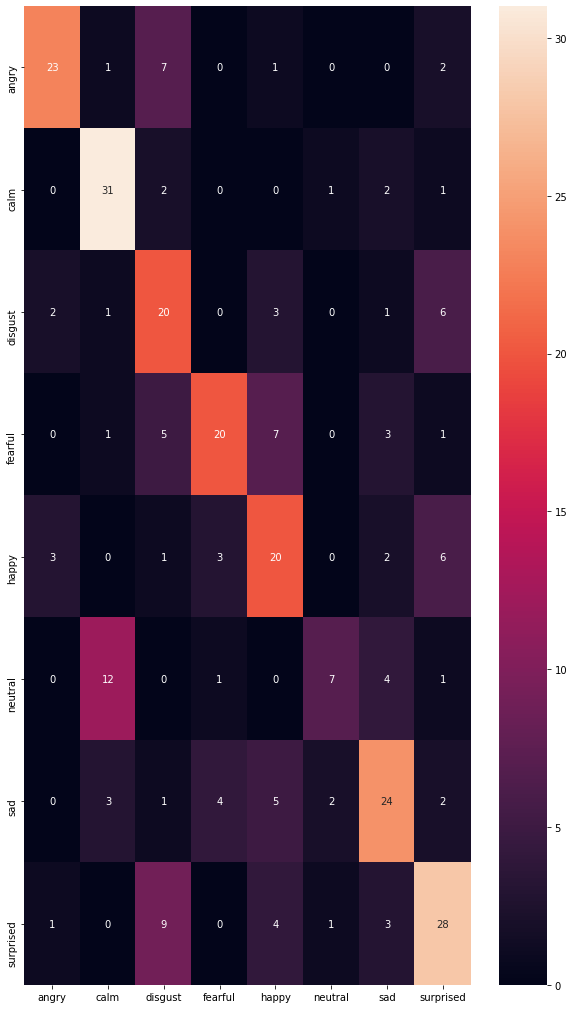

In [0]:
#generate the confusion matrix  
 cm =confusion_matrix(actual_emo, predicted_emo)  
 index = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']  
 columns = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']  
 cm_df = pd.DataFrame(cm,index,columns)                      
 plt.figure(figsize=(10,18))  
 sns.heatmap(cm_df, annot=True)
 plt.savefig('ConfusionMatrix')

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(actual_emo,predicted_emo)

0.6006944444444444

In [0]:
!pip install h5py

In [0]:
from keras.models import load_model
model.save('/content/drive/My Drive/data/new.h5')
# model.save('my_model.h5')

In [0]:
from keras.models import load_model
model.save('my_model.h5')  


In [0]:
model.load_weights('my_model.h5')

In [0]:
print(model)

In [0]:
model.predict_proba(fe)

array([[3.9242479e-04, 9.9882978e-01, 3.5884600e-08, 3.7919755e-05,
        1.0885128e-15, 7.3787686e-04, 1.9115016e-06, 3.3321461e-09]],
      dtype=float32)

In [0]:
np.argmax(p[0])

1

In [0]:
emotions[np.argmax(p[0])]

'calm'